# Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Simple Linear Regression

### Importing the data

Here I import the data, and preform some routine exploratory analysis to review my data set.

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


This is a notably small data set, so having any missing values would be notably detrimental to any analysis I preform. I'm not concerned with the presence of missing values specifically because this is a practice data set, specifically used for its assecibility, I'll still createa  aheatmap of the null/non-null values, for additional practice and assurance.

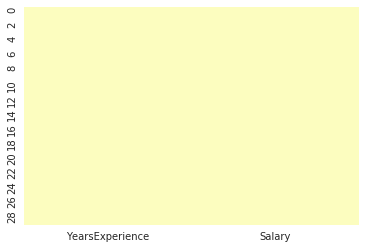

In [5]:
sns.heatmap(pd.isnull(data), cbar = False, cmap = "magma_r")

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

### Creating the Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

### Fitting the Model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
import pingouin as pg

In [13]:
aov = pg.anova(data=data, detailed=True, dv = "YearsExperience", between = "Salary")
print(aov)

   Source       SS  DF     MS  F p-unc np2
0  Salary  233.555  29  8.054  -     -   1
1  Within    0.000   0      -  -     -   -


/home/anna/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:993: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2


### Predictions

In [14]:
preds = lr.predict(X_test)

### Visualizing the Data

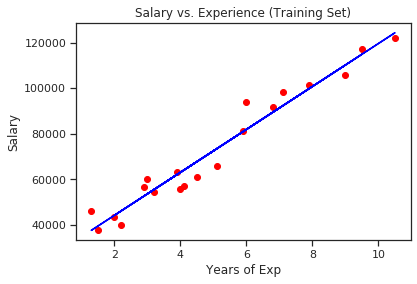

In [15]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title("Salary vs. Experience (Training Set)")
plt.xlabel("Years of Exp")
plt.ylabel("Salary")
plt.show()

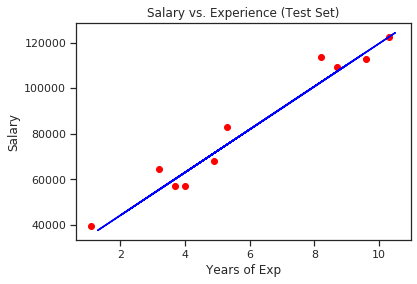

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title("Salary vs. Experience (Test Set)")
plt.xlabel("Years of Exp")
plt.ylabel("Salary")
plt.show()

#### Visualizing using Plotly

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go

In [18]:
trace1 = go.Scatter(x = X_train, y = y_train,
          mode = "markers")

trace2 = go.Scatter(x = X_train, y = lr.predict(X_train),
                   mode = "lines")

layout = go.Layout(title = "Salary vs. Experience (Training Set)")

fig = go.Figure(data=[trace1, trace2], layout=layout)

py.iplot(fig)

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



In [19]:
trace1 = go.Scatter(x = X_test, y = y_test,
          mode = "markers")

trace2 = go.Scatter(x = X_train, y = lr.predict(X_train),
                   mode = "lines")

layout = go.Layout(title = "Salary vs. Experience (Test Set)",
                  xaxis = dict(title = "Years of Exp"),
                  yaxis = dict(title = "Salary"))

fig = go.Figure(data=[trace1, trace2], layout = layout)

py.iplot(fig)

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



## Multiple Linear Regression

In [20]:
data = pd.read_csv("50_Startups.csv")

In [21]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


### Creating dummies

In [23]:
data = pd.get_dummies(data, drop_first=True)
data = data[["R&D Spend", "Administration", "Marketing Spend", "State_Florida", "State_New York", "Profit"]]

In [24]:
data.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94


In [25]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

### Test Train Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Fitting the full model

In [27]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predictions

In [28]:
preds = lr.predict(X_test)

### Backward Elimination
I'll be preforming backwards elimination 3 ways:
* Manual Backwards Elimination
* Backwards elimination with only p-values
* Backwards elimination with p-values and adjusted R^2

In [29]:
import statsmodels.api as sm

*Manual Backwards Elimination*

In [30]:
X["B0"] = np.ones(shape = X["State_Florida"].shape, dtype = int)

In [31]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,B0
0,165349.20,136897.80,471784.10,0,1,1
1,162597.70,151377.59,443898.53,0,0,1
2,153441.51,101145.55,407934.54,1,0,1
3,144372.41,118671.85,383199.62,0,1,1
4,142107.34,91391.77,366168.42,1,0,1


This is the first step of manual backwards elimination.

In [32]:
X_opt = X.iloc[:, [0,1,2,3,4,5]]

In [33]:
lr_ols = sm.OLS(endog = y, exog = X_opt).fit()

In [34]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.34e-27
Time:                        10:40:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
State_Florida     198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_New York    -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
B0               5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Second Step - State_Florida Dropped

In [35]:
X_opt = X.iloc[:, [0,1,2,3,5]]

In [36]:
lr_ols = sm.OLS(endog = y, exog = X_opt).fit()

In [37]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           8.49e-29
Time:                        10:40:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
State_Florida     220.1585   2900.536      0.076      0.940   -5621.821    6062.138
B0               5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Third Step - State_New York Dropped (State_Florida dropped previously)

In [38]:
X_opt = X.iloc[:, [0,1,2,5]]

In [39]:
lr_ols = sm.OLS(endog = y, exog = X_opt).fit()

In [40]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           4.53e-30
Time:                        10:40:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
B0               5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Step 4 - Administration Dropped (Both State variables dropped previously)

In [41]:
X_opt = X.iloc[:, [0,2,5]]

In [42]:
lr_ols = sm.OLS(endog = y, exog = X_opt).fit()

In [43]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.16e-31
Time:                        10:40:16   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
B0               4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Step 5 - Marketing Spend Dropped (Both State variables, and Administration dropped previously)

In [44]:
X_opt = X.iloc[:, [0,5]]

In [45]:
lr_ols = sm.OLS(endog = y, exog = X_opt).fit()

In [46]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           3.50e-32
Time:                        10:40:16   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
B0          4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As both the (coerced) intercept, and the R&D Spend variables are statistically significant at the 0.05 level, they will remain in the model.

*Backwards Elimination with P-values*

In [47]:
def backwardElim(x, y, sl):
    '''
    Here x is the feature data frame
    y is the response data frame
    SL is the significance level
    '''
    numVars = len(x.columns)
    for i in range(numVars):
        regress_OLS = sm.OLS(y, x).fit()
        maxVar = max(regress_OLS.pvalues)
        if maxVar > sl:
            for j, k  in enumerate(regress_OLS.pvalues):
                if (k == maxVar):
                    x = x.drop([x.columns[j]], axis = 1)
    print(regress_OLS.summary())
    return x   

In [48]:
sigL = 0.05
X_opt = X.iloc[:,[0,1,2,3,4,5]]
X_opt.shape

(50, 6)

In [49]:
Opt_Feat = backwardElim(X_opt, y, sigL)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           3.50e-32
Time:                        10:40:16   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R&D Spend      0.8543      0.029     29.151      0.0

*Backwards Regression with p-values and Adjusted R^2*

In [50]:
def backwardElimRP(x, y, sl):
    '''
    x is the feature data frame
    y is the response data frame
    sl is the significance level for the p-values
    '''
    numVars = len(x.columns)
    temp = pd.DataFrame(index = x.index, columns = x.columns) 
    for i in range(numVars):
        regress_OLS = sm.OLS(y, x).fit()
        maxVar = max(regress_OLS.pvalues)
        adj_R2_before = regress_OLS.rsquared_adj
        if maxVar > sl:
            for j, k  in enumerate(regress_OLS.pvalues):
                if (k == maxVar):
                    temp.iloc[:,j] = x.iloc[:,j]
                    x = x.drop([x.columns[j]], axis = 1)
                    temp_reg = sm.OLS(y, x).fit()
                    adj_R2_after = temp_reg.rsquared_adj
                    if (adj_R2_before >= adj_R2_after): 
                        x.insert(j, temp.columns[j],temp.iloc[:,j].values)
                        print(regress_OLS.summary())
                        return x
                    else:
                        continue
    print(regress_OLS.summary())
    return x

In [51]:
sigL = 0.05
X_opt = X.iloc[:, [0,1,2,3,4,5]]

In [52]:
Opt_Feat_RP = backwardElimRP(X_opt, y, sigL)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.16e-31
Time:                        10:40:16   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7966      0.041     

When considering both the adjusted R^2 and the pvalues, we include an additional variable: Marketing Spend. Including this variable increases the total amount of variance explained by the model, and as such we retain it.